In [1]:
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
#%matplotlib inline
%matplotlib notebook


## Integers under (+) as a group


 - Closed: $n+m \in Z$ for all n and m $\in Z$ 
 - Associative: (N+M)+R = N+(M+R)
 - Identity: 0 is the identity element because 0+N=N
 - Inverse: -N is the inverse of N because N+(-N) = 0
 


In [2]:
type(1+5)

int

In [3]:
(1+5)+6 - (1+(5+6)) 

0

In [4]:
5+0

5

In [5]:
5+(-5)

0

## 2D - Rotations as 2x2 Matrices

In [6]:
def R(theta):
    "Builds a 2D rotation matrix theta-> 2x2 numpy array"
    c = np.cos(theta)
    s = np.sin(theta)
    return np.array([[c,-s],
                     [s,c]])

In [7]:
R1 = R(np.pi/4)
R2 = R(np.pi/6)
print(R1)
print(R2)
R1@R2

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]]


array([[ 0.25881905, -0.96592583],
       [ 0.96592583,  0.25881905]])

In [8]:
R(np.pi*(1/4 +1/6))

array([[ 0.25881905, -0.96592583],
       [ 0.96592583,  0.25881905]])

In [9]:
R3 = R(np.pi/8)

(R1@R2)@R3 - R1@(R2@R3)

array([[0., 0.],
       [0., 0.]])

In [10]:
R0 = R(0)
R0@R1-R1

array([[0., 0.],
       [0., 0.]])

In [11]:
R0

array([[ 1., -0.],
       [ 0.,  1.]])

In [12]:
Rn1 = R(-np.pi/4)

Rn1@R1

array([[1., 0.],
       [0., 1.]])

### Its a group because
 - Closed: $R(\theta_1)*R(\theta_2) = R(\theta_1+\theta_2)$
 - Associative: $R(\theta_1)* ( R(\theta_2)*R(\theta_3) ) = (R(\theta_1)*R(\theta_2))  *R(\theta_3) $
 - Identity: 0 is the identity element because $*R(0)*R(\theta_1)= I_2*R(\theta_1)=R(\theta_1) )$
 - Inverse: -N is the inverse of N because $R(\theta_1)*R(-\theta_1)= I_2 )$

In [13]:
P_start = np.array([5,5])

In [14]:
P_end = R1@P_start

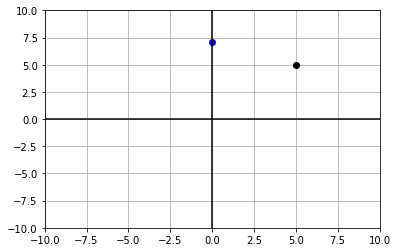

In [15]:
fig, ax = plt.subplots()
ax.plot(P_start[0],P_start[1],"ko")
ax.plot(P_end[0],P_end[1],"bo")
#plt.axis('equal')
ax.grid()
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.show()

## complex numbers

In [16]:
def R2DComplex(theta):
    c = np.cos(theta)
    s = np.sin(theta)
    return c+s*1j

In [17]:
R1 = R2DComplex(np.pi/4)

In [18]:
R1 = R2DComplex(np.pi/4)
R2 = R2DComplex(np.pi/6)
R3 = R2DComplex(np.pi/8)
R0 = R2DComplex(0)

In [19]:
R1*R2 - R2DComplex(np.pi/4 + np.pi/6)

(-1.1102230246251565e-16+1.1102230246251565e-16j)

In [20]:
(R1*R2)*R3 - R1*(R2*R3)

(5.551115123125783e-17+0j)

In [21]:
R0*R1-R1

0j

In [22]:
Rn1 = R2DComplex(-np.pi/4)
Rn1*R1

(1.0000000000000002+0j)

In [23]:
def complexToPoint(c):
    return np.array((c.real,c.imag))
def vToComplex(v):
    return v[0]+1j*v[1]

In [24]:
P_start =np.array([5,5])

C_start = vToComplex(P_start)
print(C_start)
R1 = R2DComplex(np.pi/4)
print(R1)
C_end= R1*C_start
print(C_end)

P_end = complexToPoint(C_end)
print(P_end)

(5+5j)
(0.7071067811865476+0.7071067811865476j)
7.0710678118654755j
[0.         7.07106781]


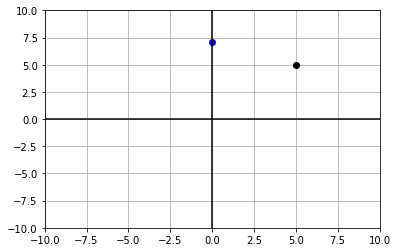

In [25]:
fig, ax = plt.subplots()
ax.plot(P_start[0],P_start[1],"ko")
ax.plot(P_end[0],P_end[1],"bo")
#plt.axis('equal')
ax.grid()
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.show()

#### Complex numbers are a group and represent the same group as 2D rotation matricies

## 3x3 matrixies represent 2D Vector addition

In [26]:
def twoDVectorMatrix(A):
    return np.array([[1,0,A[0]],
                     [0,1,A[1]],
                     [0,0,1]])

def extract2DVector(M):
    p1 = M[0:2,2]
    return p1

In [27]:
V1 = (10,5)
V2 = (3,4)
M1 = twoDVectorMatrix(V1)
M2 = twoDVectorMatrix(V2)

M1@M2

array([[ 1,  0, 13],
       [ 0,  1,  9],
       [ 0,  0,  1]])

In [28]:
V3 = extract2DVector(M1@M2)
print(V3)

[13  9]


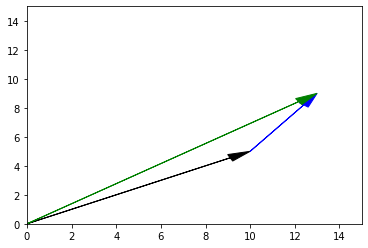

In [29]:
ax = plt.axes()
ax.arrow(0, 0, V1[0], V1[1], head_width=0.5, head_length=1, fc='k', ec='k',length_includes_head=True)
ax.arrow(V1[0], V1[1], V2[0], V2[1], head_width=0.5, head_length=1, fc='b', ec='b',length_includes_head=True)
ax.arrow(0, 0, V3[0], V3[1], head_width=0.5, head_length=1, fc='g', ec='g',length_includes_head=True)
plt.xlim(0,15)
plt.ylim(0,15)
plt.show()

In [30]:
V1 = (10,5)
V2 = (3,4)
V3 = [0,0]
for i in range(0,len(V2)):
    V3[i] = V1[i]+V2[i]
print(V3)

[13, 9]


In [31]:
N1 = np.array(V1)
N2 = np.array(V2)
N3 = N1+N2
print(N3)

[13  9]


## SE(2)

In [32]:
def se2(theta,D):
    Rt = R(theta)
    d = np.array(D).T.reshape((1,2)) 
    return np.block([
                    [Rt , d.T],
                    [0,0,   1]  
                    ])


In [33]:
se2(np.pi/4,(10,1))

array([[ 0.70710678, -0.70710678, 10.        ],
       [ 0.70710678,  0.70710678,  1.        ],
       [ 0.        ,  0.        ,  1.        ]])

In [34]:
P_start = twoDVectorMatrix((5,5))

RandT1 = se2(np.pi/2,(0,0))

endM = RandT1@P_start
extract2DVector(endM)

array([-5.,  5.])

In [35]:
P_start = twoDVectorMatrix((5,5))

RandT1 = se2(np.pi/2,(10,0))

endM = RandT1@P_start
extract2DVector(endM)

array([5., 5.])

In [36]:
twoDVectorMatrix(-np.array((10,1)))

array([[  1,   0, -10],
       [  0,   1,  -1],
       [  0,   0,   1]])

This does rotation then translation

In [37]:
def rotateAroundPoint(theta,P):
    Pn = np.array(P)
    Tp = twoDVectorMatrix(Pn)
    Tpinv = twoDVectorMatrix(-Pn)
    R = se2(theta,[0,0])
    return Tp@R@Tpinv


In [38]:
P_start = twoDVectorMatrix((5,5))
Rp = rotateAroundPoint(np.pi/4,(5,5))

endM = Rp@P_start
extract2DVector(endM)

array([5., 5.])

In [39]:
P_start = (10,0)
M_start = twoDVectorMatrix(P_start)

P_rot = (15,0)
theta = np.pi/2

Rp = rotateAroundPoint(theta,P_rot)

endM = Rp@M_start
P_end = extract2DVector(endM)
print(P_end)

[15. -5.]


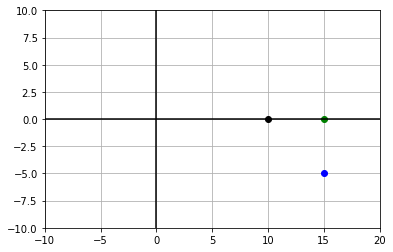

In [40]:
fig, ax = plt.subplots()
ax.plot(P_start[0],P_start[1],"ko")
ax.plot(P_rot[0],P_rot[1],"go")
ax.plot(P_end[0],P_end[1],"bo")
#plt.axis('equal')
ax.grid()
ax.set_xlim(-10,20)
ax.set_ylim(-10,10)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.show()

# SO(3)

In [41]:
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations


def SO3plot(transform = np.eye(3)):
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    lim = 3
    
    ax.set_xlim(-lim,lim)
    ax.set_ylim(-lim,lim)
    ax.set_zlim(-lim,lim)


        # draw axis
    
    for i in range(0,3):
        s = np.array([0,0,0])
        e = np.array([0,0,0])
        s[i]=lim
        e[i]=-lim
        ax.plot3D(*zip(s,e), color="k")


    
    # draw cube
    r = [-2, 2]
    for s, e in combinations(np.array(list(product(r, r, r))), 2):
        if np.sum(np.abs(s-e)) == r[1]-r[0]:
            ax.plot3D(*zip(transform@s, transform@e), color="r")
    # draw sphere
    #u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
    #x = np.cos(u)*np.sin(v)
    #y = np.sin(u)*np.sin(v)
    #z = np.cos(v)
    #ax.plot_wireframe(x, y, z, color="r")


    N=50
    stride=1
    r = 1.0
    u = np.linspace(0, 2 * np.pi, N)
    v = np.linspace(0, np.pi, N)
    x = np.outer(r*np.cos(u), r*np.sin(v))
    y = np.outer(r*np.sin(u), r*np.sin(v))
    z = np.outer(np.ones(np.size(u)), r*np.cos(v))
    print(x.shape)
    ax.plot_surface(x, y, z, linewidth=0.0, cstride=stride, rstride=stride)

<IPython.core.display.Javascript object>


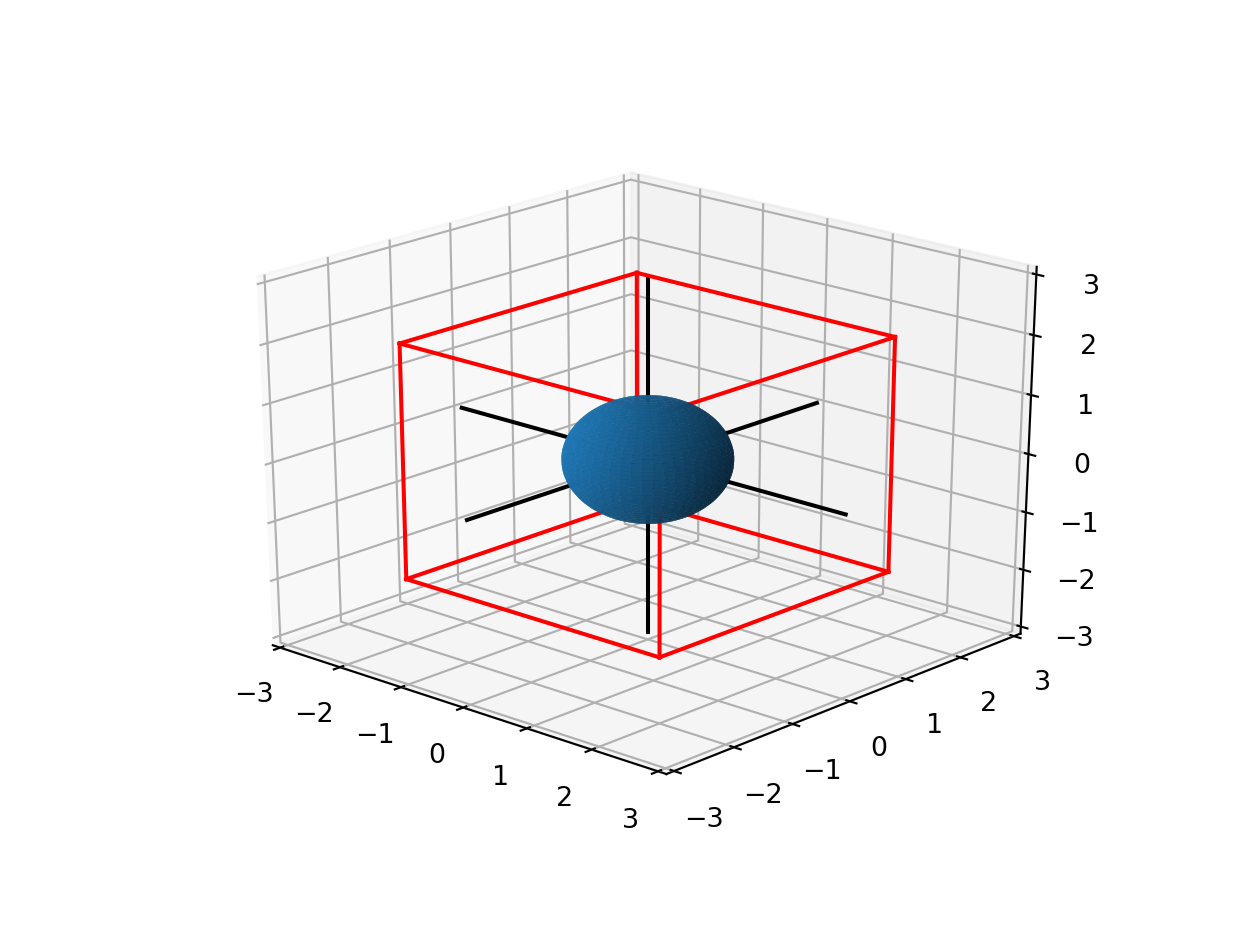

(50, 50)


In [43]:
SO3plot()

## EulerAngles

In [42]:
def Rx(theta):
    c = np.cos(theta)
    s = np.sin(theta)
    rx = np.array( [ [1, 0,  0],
                   [0, c, -s],
                   [0, s,  c] ] )
    return rx

def Ry(theta):
    c = np.cos(theta)
    s = np.sin(theta)
    ry = np.array( [ [c,  0,  s],
                     [0,  1, 0],
                     [-s, 0,  c] ] )
    return ry

def Rz(theta):
    c = np.cos(theta)
    s = np.sin(theta)
    rz = np.array( [ [c, -s,  0],
                     [s,  c,  0],
                     [0,  0,  1] ] )
    return rz

<IPython.core.display.Javascript object>


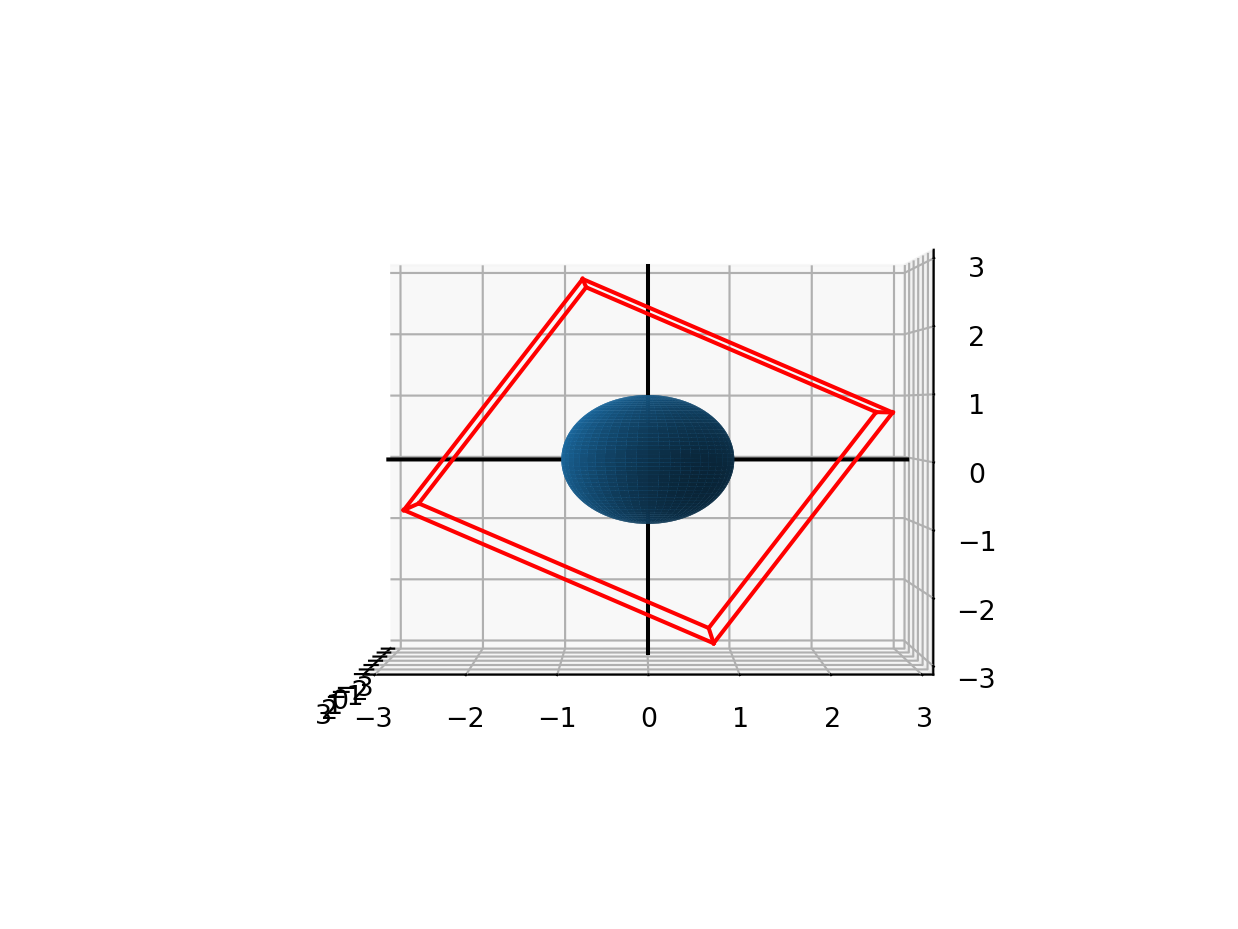

(50, 50)


In [44]:
SO3plot(Rx(np.pi/3))

<IPython.core.display.Javascript object>


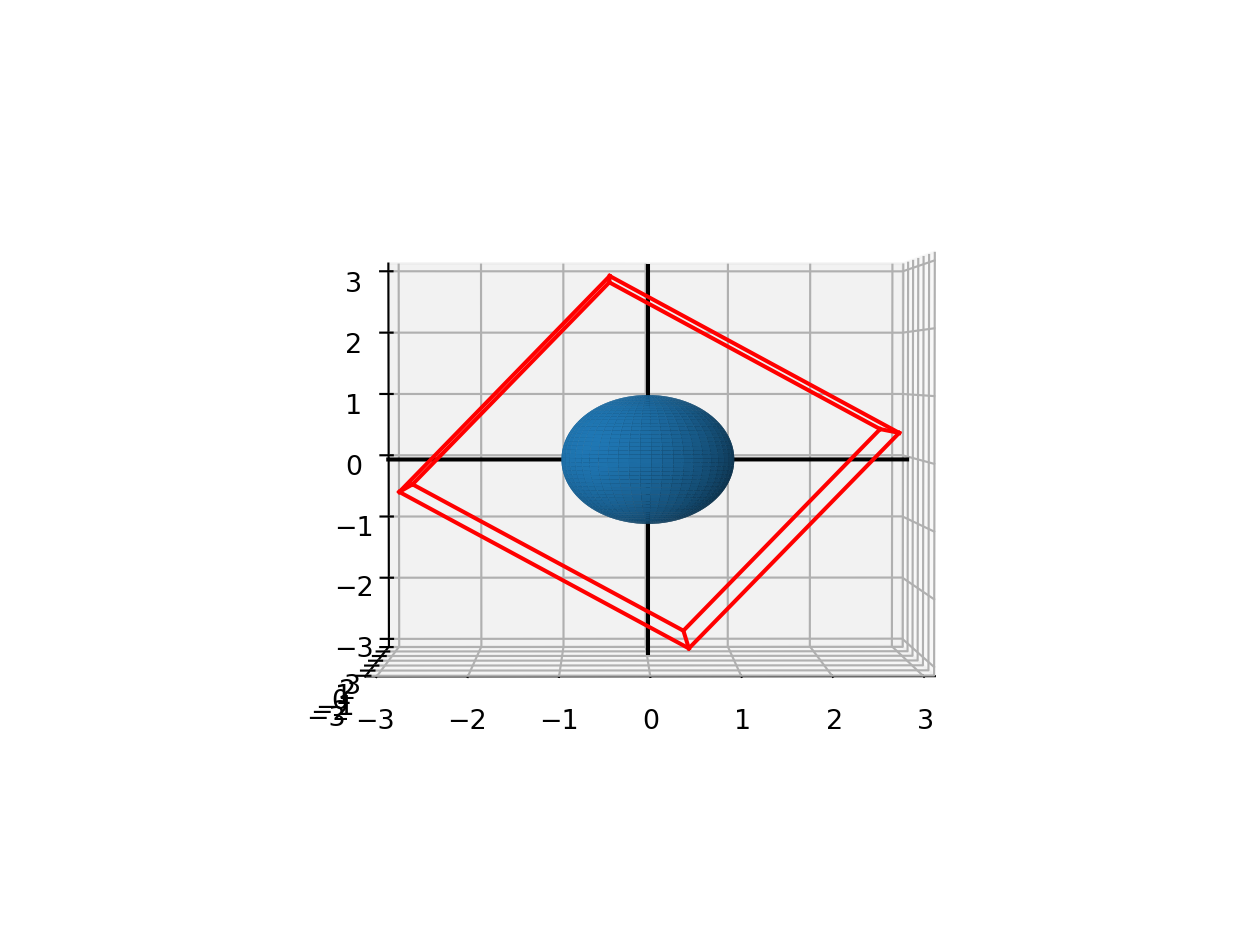

(50, 50)


In [45]:
SO3plot(Ry(np.pi/5))

In [46]:
phi = np.pi/8
theta = np.pi/6
psi = np.pi/4

def ZXpZpp(psi,theta,phi):
    return Rz(psi)@Ry(theta)@Rz(phi)

T = ZXpZpp(psi,theta,phi)
print(T)

[[ 0.29516031 -0.88762627  0.35355339]
 [ 0.83635641  0.4189367   0.35355339]
 [-0.46193977  0.19134172  0.8660254 ]]


<IPython.core.display.Javascript object>


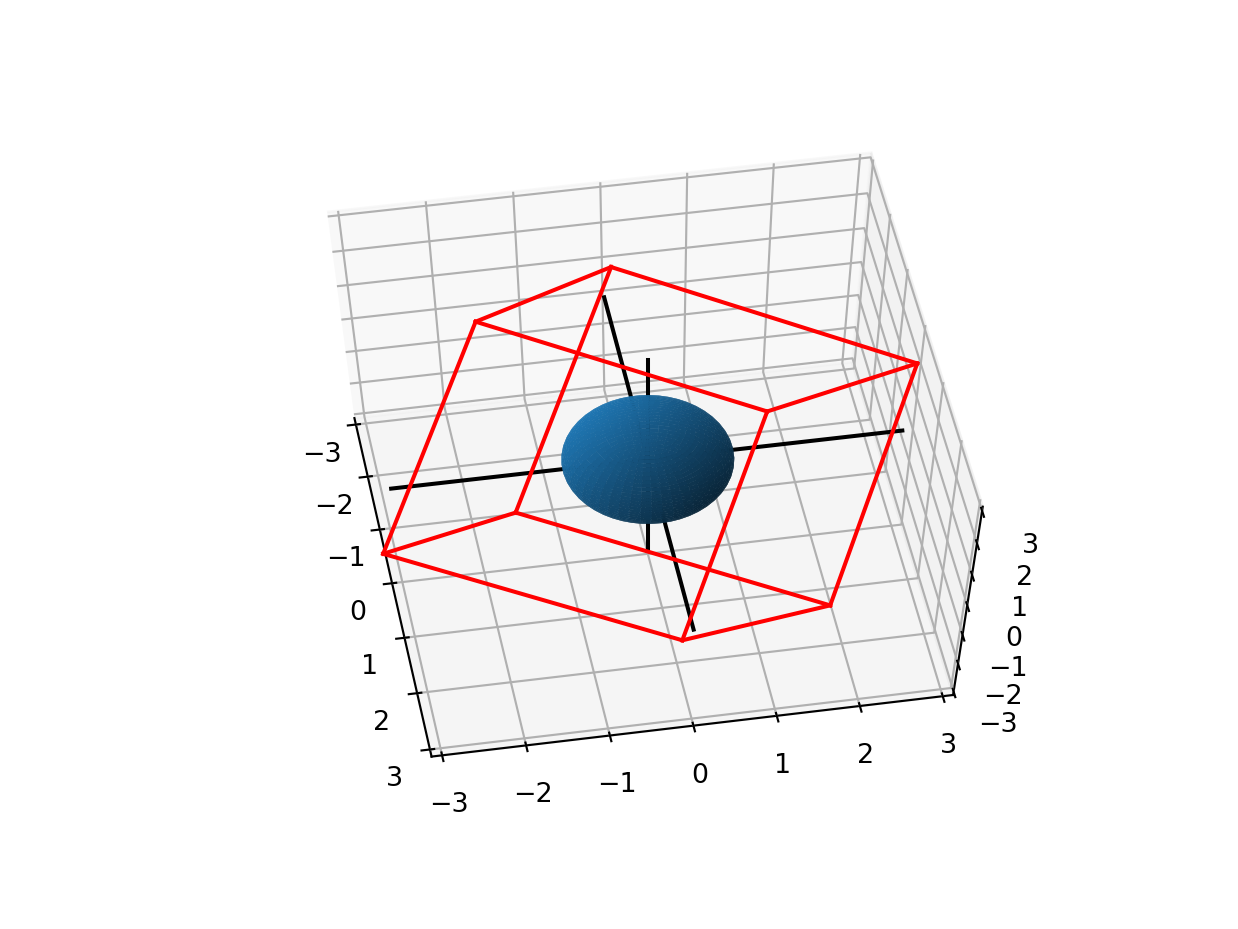

(50, 50)


In [47]:
SO3plot(T)

## Axis Angle

In [48]:
def Nx(n):
    x = n[0]
    y = n[1]
    z = n[2]
    nx = np.array( [ [0, -z,  y],
                     [z,  0,  x],
                     [-y,  x, 0] ] )
    return nx

def AxisAngle(n,theta):
    mag = np.linalg.norm(n)
    v = n/mag
    s = np.sin(theta)
    c = np.cos(theta)
    NM = Nx(v)
    r = np.eye(3)+s*NM+(1-c)*NM@NM
    return r

In [49]:
AxisAngle([0,0,1],np.pi/4)

array([[ 0.70710678, -0.70710678,  0.        ],
       [ 0.70710678,  0.70710678,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

<IPython.core.display.Javascript object>


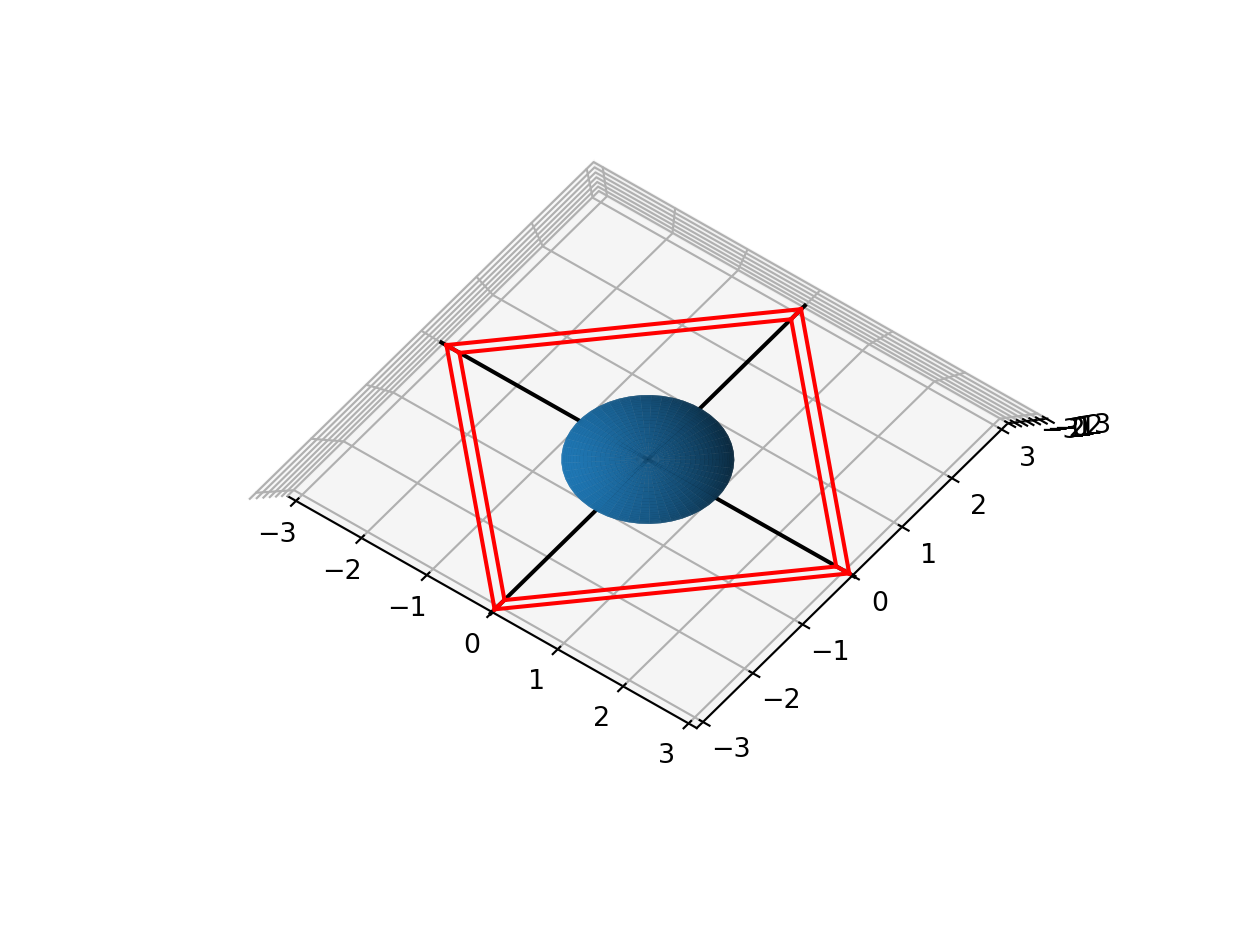

(50, 50)


In [50]:
T = AxisAngle([0,0,1],np.pi/4)
SO3plot(T)

## Conversion Between Euler and Axis Angle

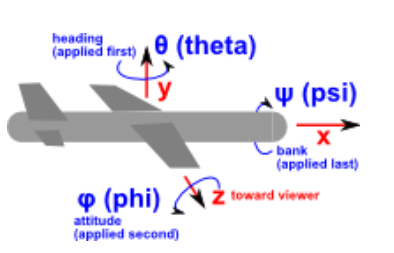

In [51]:
def YZXeulerToAxisAngle(heading, attitude, bank):
    c1 = np.cos(heading/2)
    s1 = np.sin(heading/2)
    c2 = np.cos(attitude/2)
    s2 = np.sin(attitude/2)
    c3 = np.cos(bank/2)
    s3 = np.sin(bank/2)
    
    angle = 2 * np.arccos(c1*c2*c3 - s1*s2*s3)
    x = s1*s2*c3 + c1*c2*s3
    y = s1*c2*c3 + c1*s2*s3
    z = c1*s2*c3 - s1*c2*s3
    
    v = np.array([x,y,z])
    mag = np.linalg.norm(v)
    if mag< 0.0001: return (n,np.array([1,0,0]))
    n = v/mag
    return (n,angle)

In [52]:

def AxisAngleToYZXEuler(n,angle):
    s=np.sin(angle)
    c=np.cos(angle)
    t=1-c
    mag = np.linalg.norm(n)
    v = np.array(n)/mag
    x = v[0]
    y = v[1]
    z = v[2]
    if (x*y*t + z*s) > 0.998: # north pole singularity detected
        heading = 2*np.arctan2(x*np.sin(angle/2),np.cos(angle/2))
        attitude = np.pi/2;
        bank = 0
        return (heading,attitude,bank)

    if (x*y*t + z*s) < -0.998:  # south pole singularity detected
        heading = -2*np.arctan2(x*np.sin(angle/2),np.cos(angle/2))
        attitude = -np.pi/2
        bank = 0
        return (heading,attitude,bank)
                                 
    heading = np.arctan2(y * s- x * z * t , 1 - (y*y+ z*z ) * t)
    attitude = np.arcsin(x * y * t + z * s) 
    bank = np.arctan2(x * s - y * z * t , 1 - (x*x + z*z) * t)
    return (heading,attitude,bank)

In [53]:
YZXeulerToAxisAngle(0,np.pi/4,0)

(array([0., 0., 1.]), 0.7853981633974484)

In [54]:
np.pi/4

0.7853981633974483

In [55]:
AxisAngleToYZXEuler((0,0,1),np.pi/4)

(0.0, 0.7853981633974484, 0.0)

# T(3)

In [56]:
def threeDVectorMatrix(V):
    v = np.array(V).T.reshape((1,3)) 
    return np.block([
                    [np.eye(3) , v.T],
                    [0,0,0, 1]  
                    ])

def extract3DVector(M):
    p1 = M[0:3,3]
    return p1

In [57]:
V1 = (10,5,0)
V2 = (5,5,5)
M1 = threeDVectorMatrix(V1)
M2 = threeDVectorMatrix(V2)

M1@M2

array([[ 1.,  0.,  0., 15.],
       [ 0.,  1.,  0., 10.],
       [ 0.,  0.,  1.,  5.],
       [ 0.,  0.,  0.,  1.]])

In [58]:
V3 = extract3DVector(M1@M2)
print(V3)

[15. 10.  5.]


In [62]:
def SE3plot(transform = np.eye(4),lims=[3,3,3]):
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    # draw axis
    setlims = [ax.set_xlim,ax.set_ylim,ax.set_zlim] 
    for i in range(0,3):
        s = np.array([0,0,0])
        e = np.array([0,0,0])
        s[i]=lims[i]
        e[i]=-lims[i]
        setlim=setlims[i]
        setlim(-lims[i],lims[i])
        ax.plot3D(*zip(s,e), color="k")


    
    # draw cube
    r = [-2, 2]
    for s, e in combinations(np.array(list(product(r, r, r))), 2):
        if np.sum(np.abs(s-e)) == r[1]-r[0]:
            S = transform@np.block([s,1])
            E = transform@np.block([e,1])
            ax.plot3D(*zip(S[:3],E[:3]), color="r")
    # draw sphere
    #u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
    #x = np.cos(u)*np.sin(v)
    #y = np.sin(u)*np.sin(v)
    #z = np.cos(v)
    #ax.plot_wireframe(x, y, z, color="r")

    T = extract3DVector(transform)
    N=50
    stride=1
    r = 1.0
    u = np.linspace(0, 2 * np.pi, N)
    v = np.linspace(0, np.pi, N)
    x = np.outer(r*np.cos(u), r*np.sin(v))+T[0]
    y = np.outer(r*np.sin(u), r*np.sin(v))+T[1]
    z = np.outer(np.ones(np.size(u)), r*np.cos(v))+T[2]
    ax.plot_surface(x, y, z, linewidth=0.0, cstride=stride, rstride=stride)

<IPython.core.display.Javascript object>


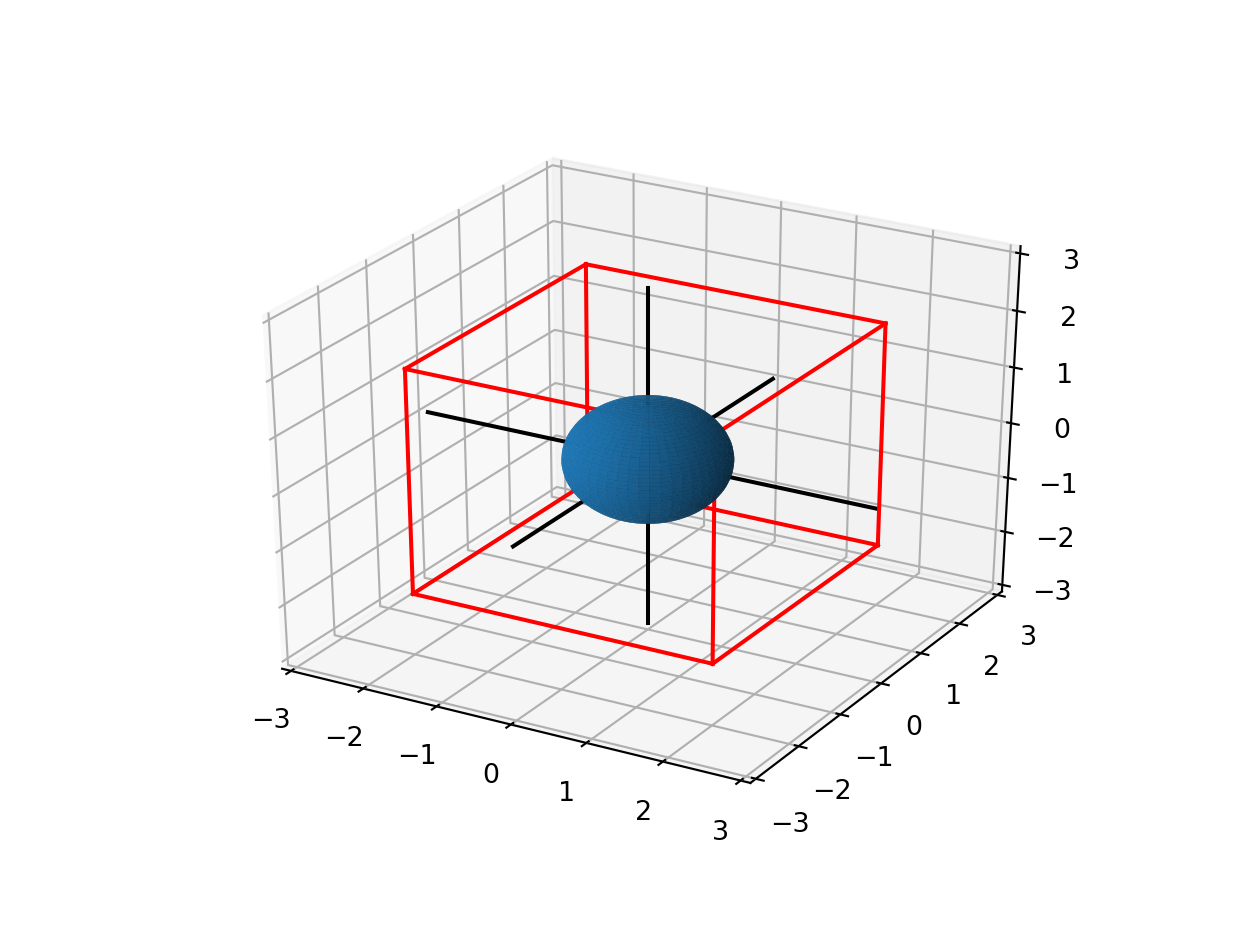

In [63]:
SE3plot()

# SE(3)

In [59]:
def ZXZD(psi,theta,phi,D):
    R = ZXpZpp(psi,theta,phi)
    d = np.array(D).T.reshape((1,3)) 
    return np.block([
                    [R , d.T],
                    [0,0,0, 1]  
                    ])

In [60]:
ZXZD(0,0,np.pi/4,(3,1,0))

array([[ 0.70710678, -0.70710678,  0.        ,  3.        ],
       [ 0.70710678,  0.70710678,  0.        ,  1.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

<IPython.core.display.Javascript object>


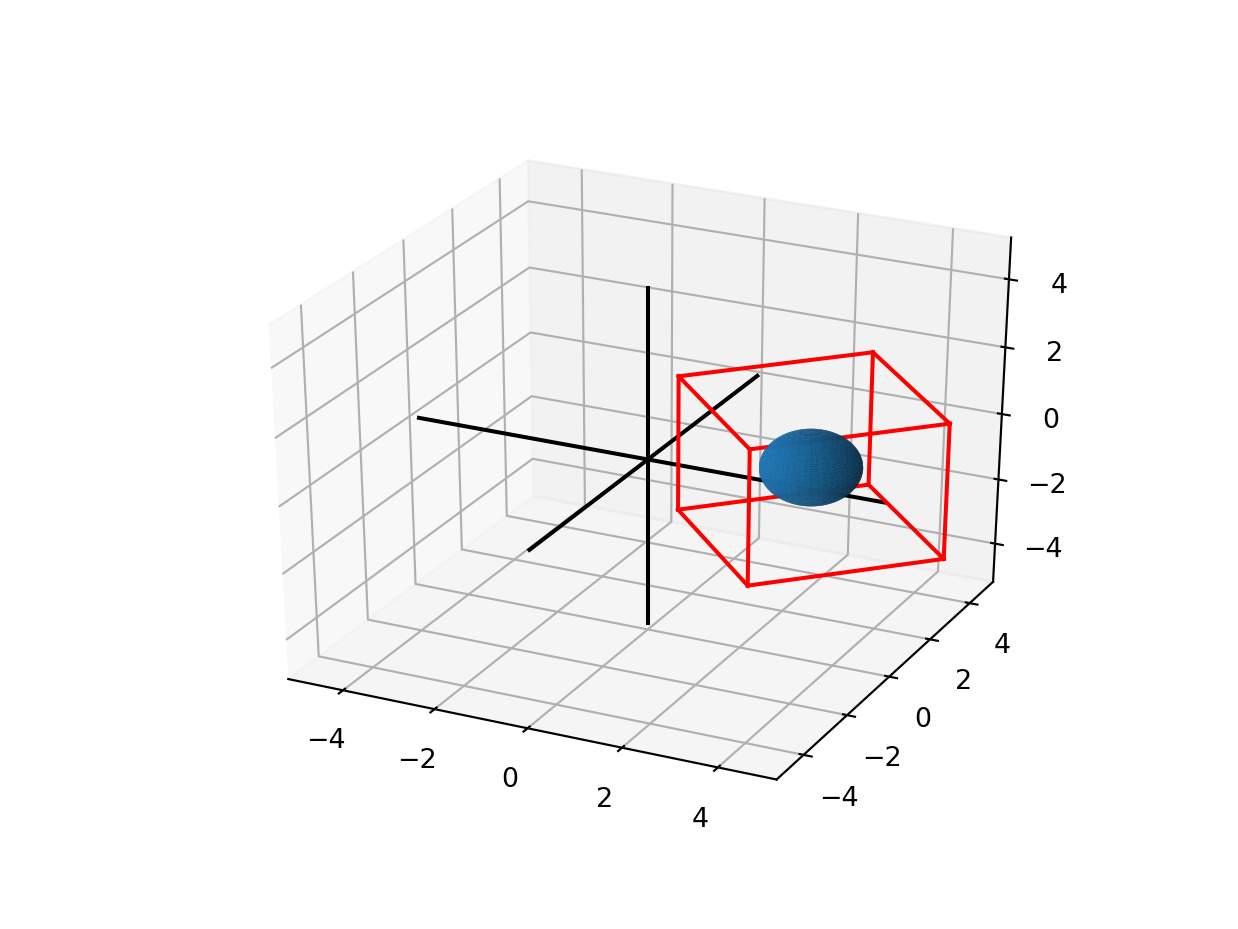

In [64]:
T = ZXZD(0,0,np.pi/4,(3,1,0))
SE3plot(T,[5,5,5])

In [65]:
def YZXD(heading, attitude, bank,D):
    ry = Ry(heading)
    rz = Rz(attitude)
    rx = Rx(bank)
    R = rx@rz@ry
    d = np.array(D).T.reshape((1,3)) 
    return np.block([
                    [R , d.T],
                    [0,0,0, 1]  
                    ])
    

In [66]:
YZXD(0,np.pi/4,0,(3,1,0))

array([[ 0.70710678, -0.70710678,  0.        ,  3.        ],
       [ 0.70710678,  0.70710678,  0.        ,  1.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [67]:
def AxisAngleDistance(n,theta,D):
    R = AxisAngle(n,theta)
    d = np.array(D).T.reshape((1,3)) 
    return np.block([
                    [R , d.T],
                    [0,0,0, 1]  
                    ])

In [68]:
n = [0,0,1]
theta = np.pi/4
D = [3,1,0]
AxisAngleDistance(n,theta,D)

array([[ 0.70710678, -0.70710678,  0.        ,  3.        ],
       [ 0.70710678,  0.70710678,  0.        ,  1.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

<IPython.core.display.Javascript object>


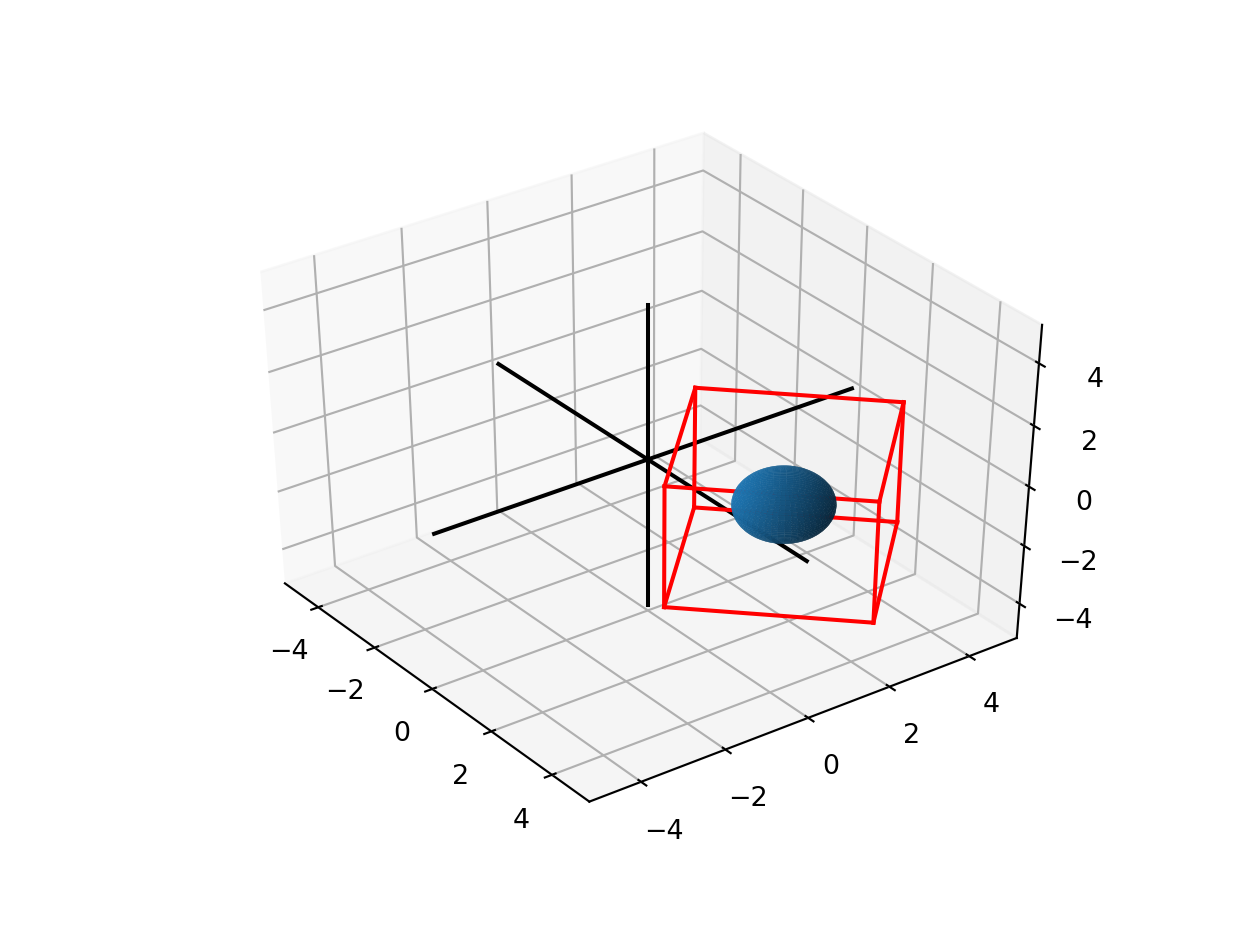

In [69]:
T = AxisAngleDistance(n,theta,D)
SE3plot(T,[5,5,5])